In [3]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.pyplot import get_cmap


from scipy.spatial.distance import cdist




In [7]:
src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir

from analysis.density import cdf_dist_arrid_vec

In [8]:
(np.sqrt(5)-1.0)/2.0

0.6180339887498949

# Load data

In [9]:
path_read = os.path.join(src_dir,os.pardir,'data_filter')
fname_read = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename = os.path.join(path_read,fname_read)
arr_pd =  np.load(filename)


In [10]:
#####
# z-score the data in each dimension
#####
N_,D_ = np.shape(arr_pd)
for d in range(D_):
    x_tmp = arr_pd[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arr_pd[:,d] = (x_tmp - x_mu)/x_std

In [11]:
## cluster-positions as described in paper

c_names = ['Average','Self-centered','Reserved',' Role Model']
arr_cd_dom = np.zeros((4,5))
arr_cd_dom[0,:] = np.array([ 0.55,0.51,-0.60,0.25,0.25 ])
arr_cd_dom[1,:] = np.array([ -0.23,0.70,-0.75,-0.56,-0.44 ])
arr_cd_dom[2,:] = np.array([ -0.54,-0.07,-0.77,0.12,0.19 ])
arr_cd_dom[3,:] = np.array([ -0.70,0.52,0.23,0.62,0.78 ])

In [12]:

arr_d = np.linspace(0.25,3.0,51)


In [13]:
arr_d

array([0.25 , 0.305, 0.36 , 0.415, 0.47 , 0.525, 0.58 , 0.635, 0.69 ,
       0.745, 0.8  , 0.855, 0.91 , 0.965, 1.02 , 1.075, 1.13 , 1.185,
       1.24 , 1.295, 1.35 , 1.405, 1.46 , 1.515, 1.57 , 1.625, 1.68 ,
       1.735, 1.79 , 1.845, 1.9  , 1.955, 2.01 , 2.065, 2.12 , 2.175,
       2.23 , 2.285, 2.34 , 2.395, 2.45 , 2.505, 2.56 , 2.615, 2.67 ,
       2.725, 2.78 , 2.835, 2.89 , 2.945, 3.   ])

In [14]:
## select which type

ind_i = 2
x_vec = arr_cd_dom[ind_i,:]
type_i = c_names[ind_i]
print(x_vec)
print(type_i)

# d_min = 0.1
# d_max = 3.0# np.max(arr_p_dist)
# N_d = 100
# arr_d = np.linspace(d_min,d_max,N_d)

n_boot = 100
n_rand = 100

arr_p, arr_p_rand, arr_p_boot = cdf_dist_arrid_vec(arr_pd, x_vec, arr_d , n_rand, n_boot)


[-0.54 -0.07 -0.77  0.12  0.19]
Reserved


In [15]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 246  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/1.8# Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
#           'text.fontsize': Ampl*10,
          'legend.fontsize': Ampl*8,
          'xtick.labelsize': Ampl*10,
          'ytick.labelsize': Ampl*10,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False

         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in maximum


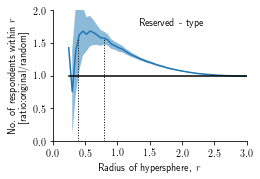

In [20]:
cmap = get_cmap('tab10')


## cumulative distribution of fraction of ponts with distance <= x
## true data and randomized data
n_std = 2

f = plt.figure()
plt.clf()
ax = f.add_subplot(111)

## original data + bootstrap
x = arr_d
y = arr_p

#     ax.plot(x,y,label='original data')

yerr = n_std*np.std(arr_p_boot,axis=0)
y1 = np.maximum(0.0*y,y - yerr)
y2 = y + yerr
#     ax.fill_between(x,y1,y2,alpha=0.5)

## randomized data
x = arr_d
y = np.mean(arr_p_rand,axis=0)
yerr = np.std(arr_p_rand,axis=0)
#     ax.plot(x,y,label='randomized data')

y1 = np.maximum(0.0*y,y - yerr)
y2 = y + yerr
#     ax.fill_between(x,y1,y2,alpha=0.5)


x = arr_d
y = arr_p/np.mean(arr_p_rand,axis=0)
yerr = n_std*np.std(  arr_p_boot/arr_p_rand ,axis=0)
ax.plot(x,y)
y1 = np.maximum(0.0*y,y - yerr)
y2 = y + yerr
ax.fill_between(x,y1,y2,alpha=0.5)
ax.plot(x,1.0+0.0*x,color='black',ls='-')


plt.figtext(0.5,0.8,'%s - type '%(type_i))

#     ax.legend(loc='upper left')
ax.set_xlabel('Radius of hypersphere, $r$')
ax.set_ylabel(r'No. of respondents within $r$' 
                "\n"
              '[ratio:original/random] ')
# plt.xscale('log')
#     ax.set_yscale('log')
ax.set_ylim(0,2)
ax.set_xlim(0,3)


ax.plot([0.4,0.4],[0,1.57],ls=':',lw=1,color='black')
ax.plot([0.8,0.8],[0,1.58],ls=':',lw=1,color='black')

plt.subplots_adjust(bottom=0.175,wspace=0.4,left=0.18)

path_save = '../figures/'
fname_save = 'commentary-freudenstein_fig-c-density-cluster.png'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename,dpi=300)